# Google Play Store Apps
Google Play Store App data of 2.3 Million+ applications.

## Context
Google PlayStore Android App Data. (2.3 Million+ App Data)
Source: https://github.com/gauthamp10/Google-Playstore-Dataset

## Content
I've collected the data with the help of Python and Scrapy running on a cloud vm instance.
The data was collected on June 2021.

Also checkout the Android App Permission dataset: https://www.kaggle.com/gauthamp10/app-permissions-android

## Acknowledgements
I couldn't have build this dataset without the help of Github Education.

Inspiration
Took inspiration from: https://www.kaggle.com/lava18/google-play-store-apps to build a big database for students and researchers.

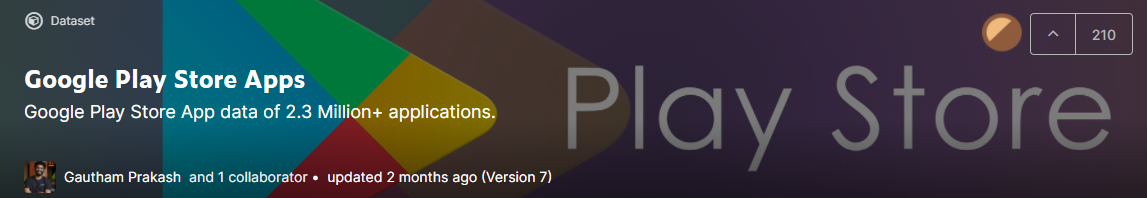

In [ ]:
# Mounted at /content/gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Now upload the file "kaggle.json" file
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vtrnhuy","key":"f958a2895893ee019719faebaf71aefb"}'}

In [ ]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=8e096f211671bb737c707d6effdfb321495eba740c3daa95ad0a13eacf47babf
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Download required dataset to a folder of your choice and extract
!kaggle datasets download -d lava18/google-play-store-apps


  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 140MB/s]


In [ ]:
!kaggle datasets download -d gauthamp10/google-playstore-apps

 95% 197M/207M [00:01<00:00, 150MB/s]
100% 207M/207M [00:01<00:00, 130MB/s]


In [ ]:
!unzip -q /content/google-play-store-apps.zip -d /content/drive/MyDrive/Week3

In [ ]:
!unzip -q /content/google-play-store-apps.zip -d .

replace ./googleplaystore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./googleplaystore_user_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./license.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


Import libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
GooglePlayStore = pd.read_csv('/content/gdrive/MyDrive/Week3/GooglePlayStore/Google-Playstore.csv')

In [ ]:
# Load columns
GooglePlayStore.columns

## About this file
This files contains Application data of more than 2M applications with the following 24 attributes.-

*   App Name
*   App Id
*   Category
*   Rating
*   Rating Count
*   Installs
*   Minimum Installs
*   Maximum Installs
*   Free
*   Price
*   Currency
*   Size
*   Minimum Android
*   Developer Id
*   Developer Website
*   Developer Email
*   Privacy Policy
*   Last Updated
*   Content Rating
*   Ad Supported
*   In app purchases
*   Editor Choice


## Question
### 1. Which category are users most interested in?
*  How is the Top 10 Categories with the most number of Apps on Google Play Store?
*  How is the installation of the Top 10 Categories with the most number of Apps on Google Play Store?
*  How is the rating of the Top 10 Categories with the most number of Apps on Google Play Store?


### 2. Does the revenue of Categories have to come from charging?
*  How is the ratio of free apps and paid apps?
*  Does the revenue of free apps have to be taken from Ads?

### 3. How is the price of Top10 Categories with the most number of Apps on Google Play Store?
*  How is the price of Top10 Categories before Covid-19 and after Covid-19?
*  Will there be an increase in the prices of Categories?



# 1 Basic Exploration

In [ ]:
GooglePlayStore.head()

In [ ]:
 # Review info
GooglePlayStore.info()

In [ ]:
# Check NULL
GooglePlayStore.isnull().sum()

In [ ]:
# Overview numerical features of the dataset 
GooglePlayStore.describe()

# 2 Clean Data

## 2.1 Remove duplicated data

In [ ]:
GooglePlayStore.duplicated().sum()

0

## 2.2 Check and change datatype

In [ ]:
GooglePlayStore.info()

## 2.3 Working with Missing Values

In [ ]:
GooglePlayStore.isna().sum()

app_name                2
category                0
rating              22883
rating_count        22883
installs              107
minimum_installs      107
maximum_installs        0
free                    0
price                   0
currency              135
size                  196
developer_id           33
released            71053
last_updated            0
content_rating          0
ad_supported            0
in_app_purchases        0
scraped_time            0
dtype: int64

In [ ]:
# Replace "unknown" to NULL
GooglePlayStore[['App Name','Installs','Minimum Installs','Currency','Size','Developer Id']] = GooglePlayStore[['App Name','Installs','Minimum Installs','Currency','Size','Developer Id']].fillna('Unknown')

In [ ]:
GooglePlayStore.describe()

,rating,rating_count,minimum_installs,maximum_installs,price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [ ]:
# Replace ' ' = '_' name of columns
GooglePlayStore.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

##2.5  Drop columns 

In [ ]:
GooglePlayStore.columns

Index(['app_name', 'category', 'rating', 'rating_count', 'installs',
       'minimum_installs', 'maximum_installs', 'free', 'price', 'currency',
       'size', 'developer_id', 'released', 'last_updated', 'content_rating',
       'ad_supported', 'in_app_purchases', 'scraped_time'],
      dtype='object')

In [ ]:
cols_drop = ['app_id', 'minimum_android', 'developer_website', 'developer_email', 'privacy_policy', 'editors_choice']

# Drop unnecessary columns from cols_drop
GooglePlayStore.drop(cols_drop, axis='columns', inplace=True)

In [ ]:
GooglePlayStore.columns

Index(['app_name', 'category', 'rating', 'rating_count', 'installs',
       'minimum_installs', 'maximum_installs', 'free', 'price', 'currency',
       'size', 'developer_id', 'released', 'last_updated', 'content_rating',
       'ad_supported', 'in_app_purchases', 'scraped_time'],
      dtype='object')

In [ ]:
# Check: No output means passed!
assert GooglePlayStore.columns.all() not in cols_drop

In [ ]:
# Specifying the datetime format significantly reduces conversion time
GooglePlayStore['released'] = pd.to_datetime(GooglePlayStore['released'], format='%b %d, %Y', errors='coerce')

## 2.6 Convert size to float

In [ ]:
# Strip of all text and convert to numeric
GooglePlayStore['size'] = pd.to_numeric(GooglePlayStore['size'].str.replace(r'[a-zA-Z]+', ''), errors='coerce')

In [ ]:
# Check: No output means passed!
assert GooglePlayStore['size'].dtype == 'float64'

# 3 Exploratory Data Analysis (EDA) 

### 3.1 Overview number of apps

In [ ]:
# Creat column year, month, month_year trong Google Play Store
GooglePlayStore['year'] = GooglePlayStore['released'].dt.year
GooglePlayStore['month'] = GooglePlayStore['released'].dt.month
GooglePlayStore['month_year'] = pd.to_datetime(GooglePlayStore['released']).dt.to_period('M')
GooglePlayStore.info()

In [ ]:
# Creat month_app: count app_name by month/year
month_app = GooglePlayStore.groupby(['year','month'])['app_name'].count().reset_index()
month_app.rename(columns={'app_name':'count_app'},inplace=True)
month_app.head()

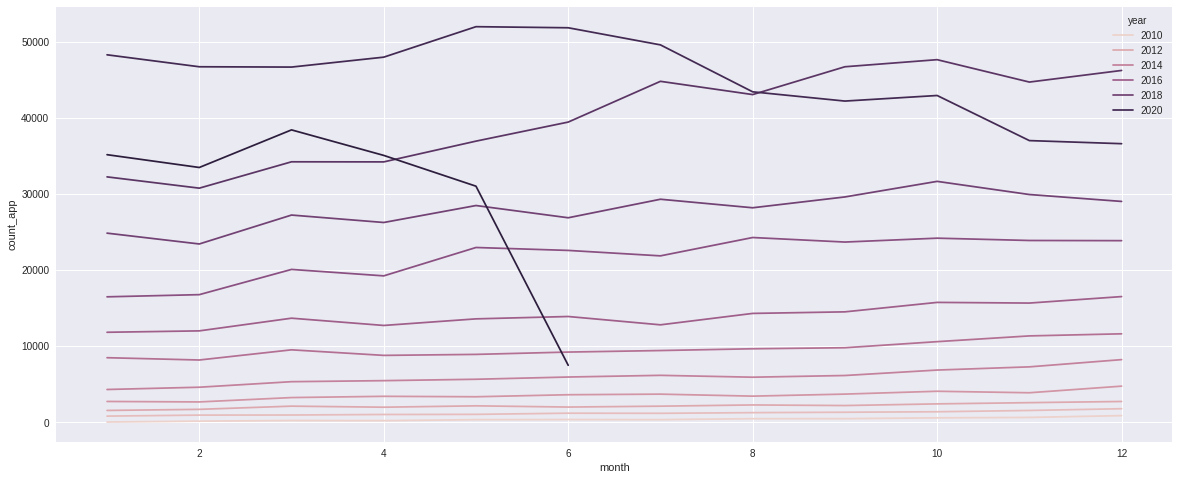

In [ ]:
# Show plot count_app by month/year
plt.style.use('seaborn-bright')
plt.figure(figsize=(20,8))
sns.lineplot(data=month_app,x='month',y='count_app',color='tab:red',hue='year')
plt.show()

In [ ]:
# Creat Google Play Store before 2019
gps_2019 = GooglePlayStore[(GooglePlayStore['year'] <= 2019)]
gps_2019.shape

(1516501, 21)

In [ ]:
# Creat Google Play Store after 2019
gps2020_ = GooglePlayStore[(GooglePlayStore['year'] > 2019)]
gps2020_.shape

(725390, 21)

In [ ]:
# Count app by year
year_app = GooglePlayStore.groupby('year')['app_name'].count().reset_index()
year_app.rename(columns = {'app_name':'count_app'},inplace=True)
year_app

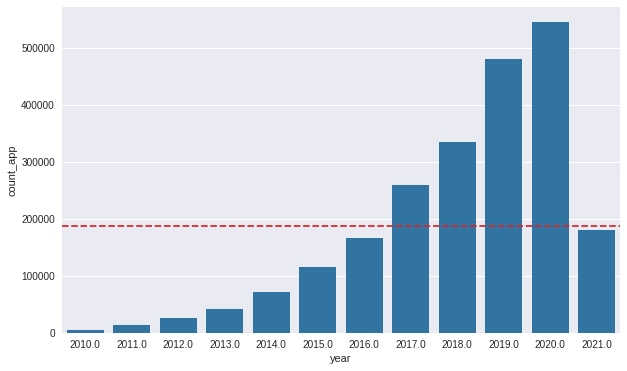

In [ ]:
# Show plot of count_app by year (2010-2021)
avg_year_app = year_app['count_app'].mean()
plt.figure(figsize=(10,6))

sns.barplot(data=year_app,x='year',y='count_app',color='tab:blue')
plt.axhline(avg_year_app, color='tab:red', linestyle='--')

plt.show()

**Conclusion:**
*   Number of Category tends to increase over the years 
*   Number of Categories after 2019 increased sharply compared to before 2019: nearly 50% of total of Categories from 2010 to 2021



Which category are users most interested in?
*  How is the Top 10 Categories with the most number of Apps on Google Play Store?
*  How is the installation of the Top 10 Categories with the most number of Apps on Google Play Store?
*  How is the rating of the Top 10 Categories with the most number of Apps on Google Play Store?



### 3.2 Top 10 Categories most quantity

Categories have quantity more than average

In [ ]:
# Number of categories have quantity more than average
count_cate = GooglePlayStore.groupby('category')['app_name'].count().reset_index()
count_cate.rename(columns={'app_name': 'count_categories'},inplace=True)
avg_cate = count_cate['count_categories'].mean()
top_higer_avg_cate = count_cate[(count_cate['count_categories'] > avg_cate)]
top_higer_avg_cate['category'].count()


17

In [ ]:
# Rate top_higer_avg_cate vs count_cate
top_higer_avg_cate['count_categories'].count()/count_cate['count_categories'].count()

0.3541666666666667

Take out Top 10 and EDA

In [ ]:
# Top 10 Categories have the most quantity apps (take from top_higer_avg_cate)
top10_cate_dict = ['Education','Music & Audio','Tools','Business','Entertainment','Lifestyle','Books & Reference','Personalization','Health & Fitness','Productivity','Shopping']

In [ ]:
count_cate = GooglePlayStore.groupby('category')['app_name'].count().reset_index() # Count app by Category
top10_cate = count_cate[(count_cate['category'].isin(top10_cate_dict))] # Filter in top10_cate_dict
count_cate.rename(columns={'app_name': 'count_categories'},inplace=True) # Rename app_name to count_categories of count_cate
top10_cate.rename(columns={'app_name': 'count_categories'},inplace=True) # Rename app_name to count_categories of top10_cate
top10_cate

In [ ]:
top10_cate['mean_categorys'] = top10_cate['count_categories'] / top10_cate['count_categories'].sum()

In [ ]:
# Rate of Top 10 Categories with the most number of Apps on Google Play Store
top10_cate['count_categories'].count()/count_cate['count_categories'].count()

0.22916666666666666

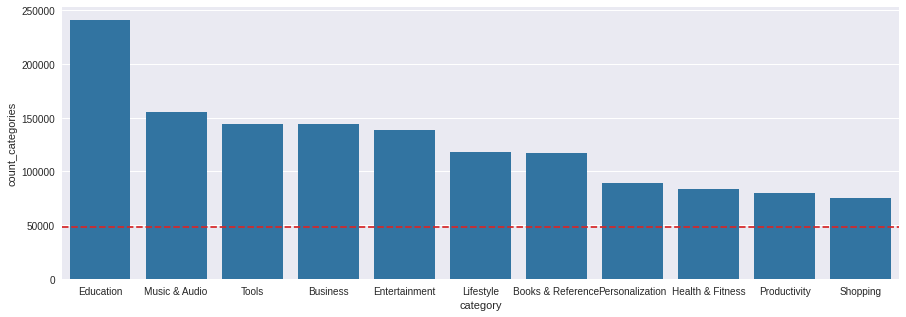

In [ ]:
# Distribution chart of Top 10 Categories
avg_cate = count_cate['count_categories'].mean()
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,5))
sns.barplot(data=top10_cate,x='category',y='count_categories',color='tab:blue',
            order = top10_cate_dict)
plt.axhline(avg_cate, color='tab:red', linestyle='--')
plt.show()

In [ ]:
# Check how the percentage of apps of Education Category (Category has the largest number of apps on Google Play Store)
top10_cate[(top10_cate['category'] == 'Education')]['count_categories'].sum() / top10_cate['count_categories'].sum()

0.17410186862165683

**Conclusion:**
Looks like educational apps make up more than one six of the data of Top 10 (17,4%).

## 3.3 Explore installation of the Top 10

In [ ]:
# Mean of maximum_installs  
install_mean_cate = GooglePlayStore['maximum_installs'].mean()
install_mean_cate

320201.713137456

In [ ]:
# Creat install_top10_cate with mean of ['maximum_installs','rating','rating_count'] per 'category'
install_top10_cate = GooglePlayStore.groupby('category')['maximum_installs','rating','rating_count','price'].mean().reset_index()
install_top10_cate = install_top10_cate[install_top10_cate['category'].isin(top10_cate_dict)]
install_top10_cate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,category,maximum_installs,rating,rating_count,price
7,Books & Reference,88319.642785,2.467159,662.764020,0.193225
8,Business,59662.834619,1.439082,438.409684,0.057301
15,Education,44855.566203,2.246840,437.106541,0.163241
17,Entertainment,235361.901190,2.435374,1635.378324,0.050845
21,Health & Fitness,96615.933098,1.623777,958.254522,0.098903
24,Lifestyle,86988.193795,1.930376,799.114763,0.075942
28,Music & Audio,148618.684086,2.226841,1266.331505,0.042298
31,Personalization,195912.760150,2.758754,1386.884409,0.109153
33,Productivity,569253.061306,1.937928,1920.808637,0.133151
37,Shopping,176574.485131,1.837001,2814.967680,0.008315


In [ ]:
# Creat top10_cate_final by inner join 'install_top10_cate' & top10_cate
top10_cate_final = pd.merge(left=top10_cate,
                     right=install_top10_cate,
                     how='inner',
                     on='category')
                     
top10_cate_final

,category,count_categories,mean_categorys,maximum_installs,rating,rating_count
0,Books & Reference,116728,0.084295,88319.642785,2.467159,662.764020
1,Business,143771,0.103823,59662.834619,1.439082,438.409684
2,Education,241090,0.174102,44855.566203,2.246840,437.106541
3,Entertainment,138276,0.099855,235361.901190,2.435374,1635.378324
4,Health & Fitness,83510,0.060306,96615.933098,1.623777,958.254522
5,Lifestyle,118331,0.085452,86988.193795,1.930376,799.114763
6,Music & Audio,154906,0.111865,148618.684086,2.226841,1266.331505
7,Personalization,89210,0.064423,195912.760150,2.758754,1386.884409
8,Productivity,79698,0.057553,569253.061306,1.937928,1920.808637
9,Shopping,75256,0.054346,176574.485131,1.837001,2814.967680


<function matplotlib.pyplot.show>

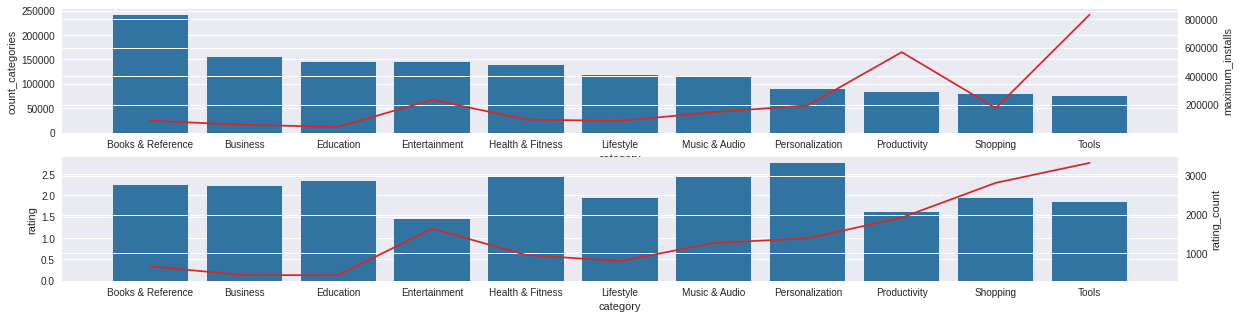

In [ ]:
# Show top10_cate_final
plt.figure(figsize=(20,5))
plt.subplot(211) 
sns.barplot(data=top10_cate_final,x='category',y='count_categories',color='tab:blue',
            order=top10_cate_dict) # Show count_categories per category
plt.twinx()
sns.lineplot(data=top10_cate_final,x='category',y='maximum_installs',color='tab:red') # Show maximum_installs per category

plt.subplot(212) 
sns.barplot(data=top10_cate_final,x='category',y='rating',color='tab:blue',
            order=top10_cate_dict) # Show rating per category
plt.twinx()
sns.lineplot(data=top10_cate_final,x='category',y='rating_count',color='tab:red') # Show rating_count per category
plt.show

**Conclusion:**
Except for the shopping category, we notice that the rating_count and maximum_install tend to be the same across Categories

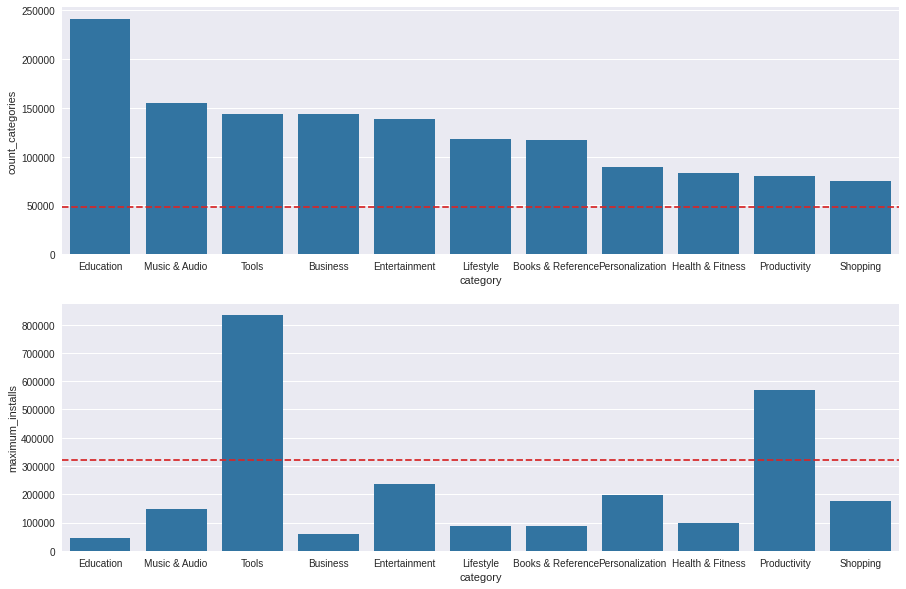

In [ ]:
# Distribution chart of Top 10 Categories
avg_cate = count_cate['count_categories'].mean()
install_count_cate = GooglePlayStore['maximum_installs'].mean()
plt.style.use('tableau-colorblind10') # Use style 'tableau-colorblind10'
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.barplot(data=top10_cate,x='category',y='count_categories',color='tab:blue',
            order = top10_cate_dict) # Show count_categories per category
plt.axhline(avg_cate, color='tab:red', linestyle='--')
plt.subplot(212)
sns.barplot(data=install_top10_cate,x='category',y='maximum_installs',color='tab:blue',
            order = top10_cate_dict) # Show maximum_installs per category
plt.axhline(install_count_cate, color='tab:red', linestyle='--')
plt.show()

**Conclusion:**
*   Categories have a lot of apps doesn't mean they have a lot of installs
*   Except 2 apps (Tools and Productivity) with the highest number of apps and installs in the top 10 (higher than the average number of installs across categories)
*   How do we continue to analyze more about Tools, Productivity & Education Category before and after Covid-19 (2019)?

In [ ]:
# Creat dictionary ['Productivity','Tools','Education']
tool_productivity_edu_dict = ['Productivity','Tools','Education']

In [ ]:
gps_2019.shape

(1516501, 21)

In [ ]:
# Filter gps_2019 have category that is tool_productivity_edu_dict
gps_2019_tool_productivity_edu =  gps_2019[(gps_2019['category'].isin(tool_productivity_edu_dict))]
gps_2019_tool_productivity_edu.shape

(306404, 21)

In [ ]:
gps_2019_tool_productivity_edu.head()

In [ ]:
# Creat count_gps_2019_tool_productivity_edu  (before 2019)
count_gps_2019_tool_productivity_edu = gps_2019_tool_productivity_edu.groupby('category')['app_name'].count().reset_index()
count_gps_2019_tool_productivity_edu.rename(columns={'app_name':'count_app'},inplace=True)
count_gps_2019_tool_productivity_edu

,category,count_app
0,Education,160247
1,Productivity,52989
2,Tools,93168


In [ ]:
gps2020_.shape

(725390, 21)

In [ ]:
gps2020__tool_productivity_edu =  gps2020_[(gps2020_['category'].isin(tool_productivity_edu_dict))]
gps2020__tool_productivity_edu.shape

(143321, 21)

In [ ]:
# Creat count_gps2020__tool_productivity_edu (after 2019)
count_gps2020__tool_productivity_edu = gps2020__tool_productivity_edu.groupby('category')['app_name'].count().reset_index()
count_gps2020__tool_productivity_edu.rename(columns={'app_name':'count_app'},inplace=True)
count_gps2020__tool_productivity_edu

,category,count_app
0,Education,75869
1,Productivity,22286
2,Tools,45166


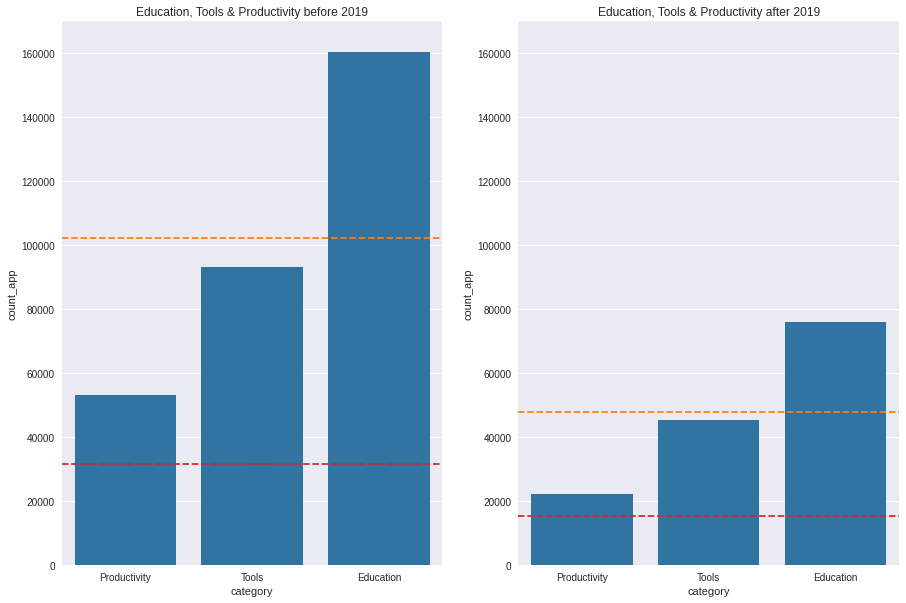

In [ ]:
# Distribution chart of Top 2 Categories
avg_year_app_2019_tpe = count_gps_2019_tool_productivity_edu['count_app'].mean() # mean of count_gps_2019_tool_productivity_edu
avg_year_app_2020__tpe = count_gps2020__tool_productivity_edu['count_app'].mean() # mean of count_gps2020__tool_productivity_edu
avg_year_app_2019 = gps_2019.groupby('category')['app_name'].count().mean() # mean of gps_2019
avg_year_app_2020_ = gps2020_.groupby('category')['app_name'].count().mean() # mean of gps2020_
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.barplot(data=count_gps_2019_tool_productivity_edu,x='category',y='count_app',color='tab:blue',
            order = tool_productivity_edu_dict) # Show count_gps_2019_tool_productivity_edu: count_app by category
plt.title('Education, Tools & Productivity before 2019')
plt.axhline(avg_year_app_2019_tpe, color='tab:orange', linestyle='--')
plt.axhline(avg_year_app_2019, color='tab:red', linestyle='--') # show mean before 2019
plt.ylim(0,170000)

plt.subplot(122)
sns.barplot(data=count_gps2020__tool_productivity_edu,x='category',y='count_app',color='tab:blue',
            order = tool_productivity_edu_dict) # Show count_gps2020__tool_productivity_edu: count_app by category
plt.title('Education, Tools & Productivity after 2019')
plt.ylim(0,170000)
plt.axhline(avg_year_app_2020__tpe, color='tab:orange', linestyle='--')
plt.axhline(avg_year_app_2020_, color='tab:red', linestyle='--') # show mean after 2019

plt.show()

**Rating Top 10**

In [ ]:
# Filter gps_notnull_having 'ratng' is not null
gps_notnull_rate = GooglePlayStore[(pd.notnull(GooglePlayStore['rating']))]
gps_notnull_rate.head()

In [ ]:
gps_notnull_rate.isna().sum()

In [ ]:
# Filter gps_notnull_rate_top10 (not null & Top 10)
gps_notnull_rate_top10 = gps_notnull_rate[gps_notnull_rate['category'].isin(top10_cate_dict)]
gps_notnull_rate_top10.shape

(1374940, 18)

In [ ]:
# Creat rate_app_top10 (count_app)
rate_app_top10 = gps_notnull_rate_top10.groupby('rating')['app_name'].count().reset_index()
rate_app_top10.rename(columns={'app_name':'count_app'},inplace=True)
rate_app_top10 = rate_app_top10[(rate_app_top10['rating'] > 0)]
rate_app_top10

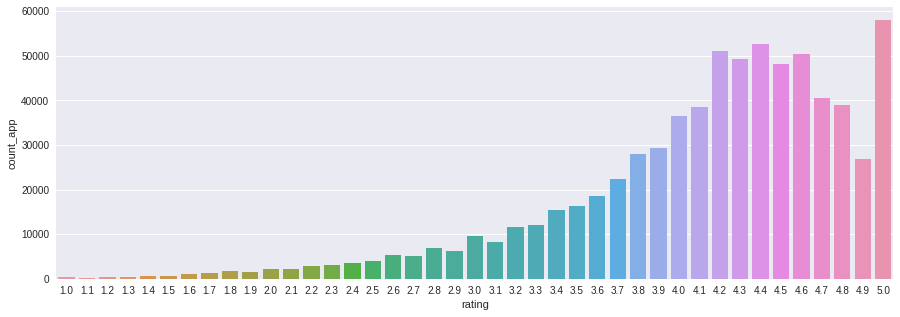

In [ ]:
# Show distribution of rating & count_app
plt.figure(figsize=(15,5))
sns.barplot(data=rate_app_top10,x='rating',y='count_app')
plt.show()


In [ ]:
# Creat rate_app_top10 (count_app)
rate_count_app_top10 = gps_notnull_rate_top10.groupby('rating')['rating_count'].sum().reset_index()
rate_count_app_top10 = rate_count_app_top10[(rate_count_app_top10['rating'] > 0)]
rate_count_app_top10

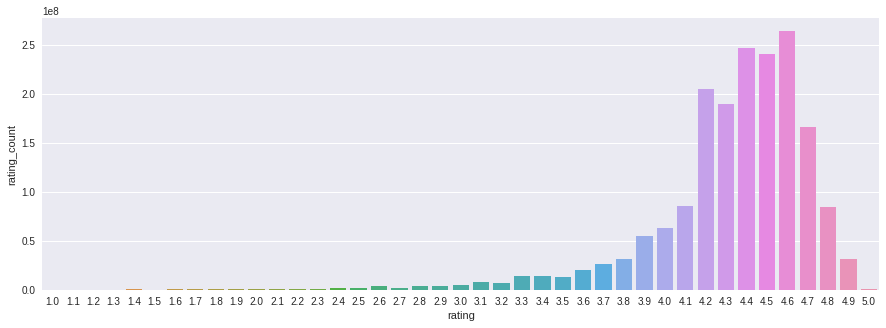

In [ ]:
# Show distribution of rating & rating_count
plt.figure(figsize=(15,5))
sns.barplot(data=rate_count_app_top10,x='rating',y='rating_count')
plt.show()

**Conclusion:**
Evaluating the rating to select the Categories that users are interested in, we should consider the rating in the range of 4.0-4.8

**How developer make money**
*  How is the ratio of free apps and paid apps?
*  Does the revenue of free apps have to be taken from Ads?

In [ ]:
# Creat series free_cate
free_cate = GooglePlayStore.groupby('free')['app_name'].count()
free_cate

free
False      45068
True     2267876
Name: app_name, dtype: int64

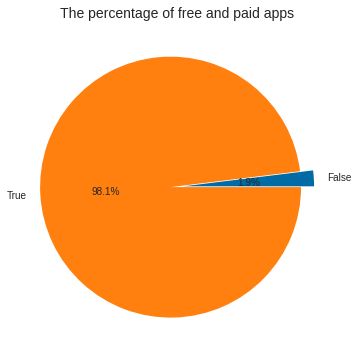

In [ ]:
plt.style.use('tableau-colorblind10')
pie, ax = plt.subplots(figsize=[10,6])
labels = free_cate.keys()
plt.pie(x = free_cate, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("The percentage of free and paid apps", fontsize=14);
plt.show()

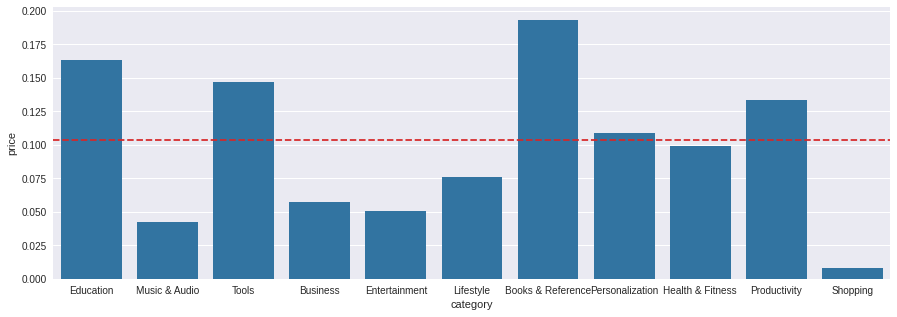

In [ ]:
avg_price = GooglePlayStore['price'].mean()
plt.figure(figsize=(15,5))
sns.barplot(data=install_top10_cate,x='category',y='price',color='tab:blue',
            order=top10_cate_dict)
plt.axhline(avg_price, color='tab:red', linestyle='--')
plt.show()


**Conclusion:**
*   The price of Eduction, Tools, Productivity & Personalization Category is higher than the average price of Categories on Google Play Store
*   This means that Eduction, Tools & Productivity are 3 Categories for us to analyze more closely



**About pricing top 10 categories, bbserve before Covid-19 and after Covid-19**

In [ ]:
# Create a mask for paid apps
is_paid = (GooglePlayStore['price'] > 0) & (GooglePlayStore['price'] < 12)
price_top10_cate = GooglePlayStore[is_paid & GooglePlayStore['category'].isin(top10_cate_dict) ]
price_top10_cate

In [ ]:
# Creat price_top10_cate_2020 (Price of Top10 after 2019)
price_top10_cate_2020 = gps2020_[is_paid & gps2020_['category'].isin(top10_cate_dict) ]
price_top10_cate_2020

In [ ]:
# Creat price_top10_cate__2019 (Price of Top10 before 2019)
price_top10_cate__2019 = gps_2019[is_paid & gps_2019['category'].isin(top10_cate_dict) ]
price_top10_cate__2019

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


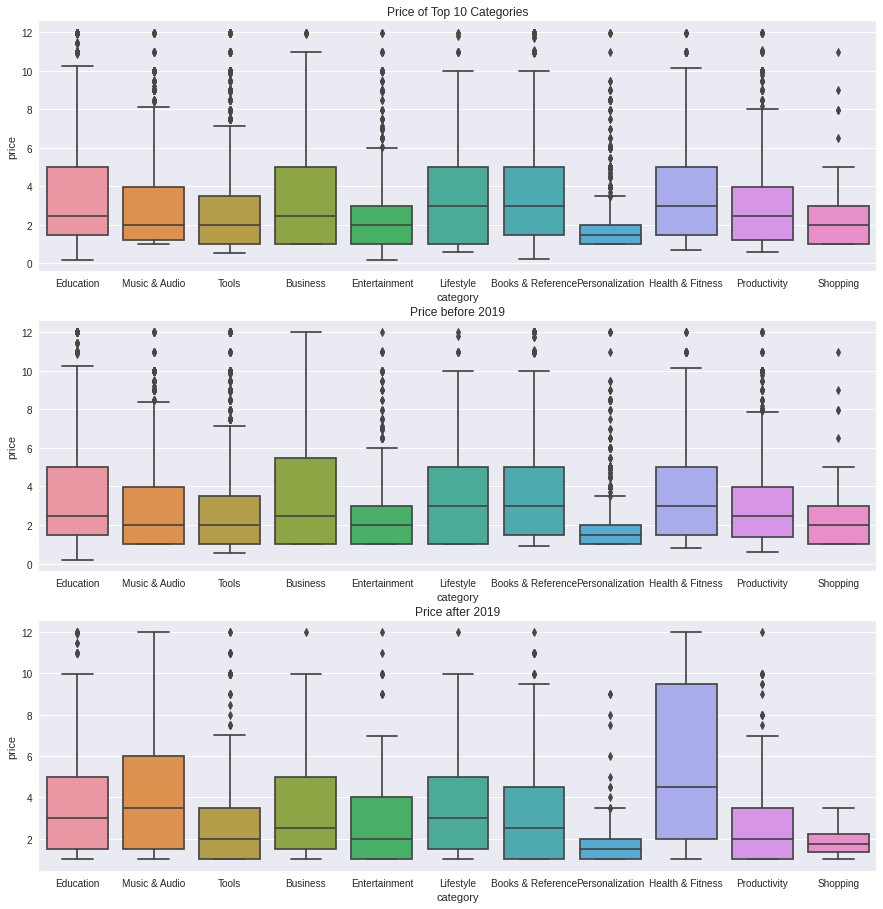

In [ ]:
# Show price_top10_cate_2020 & price_top10_cate__2019
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.boxplot(data=price_top10_cate[is_paid], x='category',y='price',
order = top10_cate_dict)
plt.title('Price of Top 10 Categories')
plt.subplots_adjust(top=1.6)

plt.subplot(312)
sns.boxplot(data=price_top10_cate__2019[is_paid], x='category',y='price',
order = top10_cate_dict)
plt.title('Price before 2019')
plt.subplots_adjust(top=1.6)

plt.subplot(313)
sns.boxplot(data=price_top10_cate_2020[is_paid], x='category',y='price',
order = top10_cate_dict)
plt.title('Price after 2019')
plt.subplots_adjust(top=1.6)
plt.show()

**Conclusion:**
*   Price of Education, Music&Audio and Health&Fitness after Covid-19 are higher than before Covid-19
*   Specially Health&Fitness has a clear price increase
*   Assuming we choose Education Categories to develop the application, how will be the average revenue expected to be annually?



